In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import yaml
from PIL import Image
import os
import seaborn as sns
import glob
import plotly.express as px

In [2]:
warnings.filterwarnings("ignore")
# Set random seed for reproducibility
np.random.seed(12345)

In [3]:
# Define paths
Input_path = r'D:\second dataset'  # Path to dataset
Work_path = r'D:\second dataset\output'   # Path for outputs

In [4]:
# Class definitions
num_classes = 11
classes = ['Gloves', 'Hardhat', 'Mask', 'NO-Gloves', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Boot', 'NO-Safety Vest', 'Person', 'Safety Boot', 'Safety Vest']

In [5]:
# Dictionary for class index
class_idx = {str(i): classes[i] for i in range(num_classes)}

In [6]:
# Prepare data for YAML file
dict_file = {
    'train': os.path.join(Input_path, 'train'),
    'val': os.path.join(Input_path, 'valid'),
    'test': os.path.join(Input_path, 'test'),
    'nc': num_classes,  # Number of classes
    'names': classes    # Class names
}

In [7]:
# Class statistics and dataset lengths
class_stat = {}
data_len = {}

# Checking for the presence of new classes in the annotations
for mode in ['train', 'valid', 'test']:
    class_count = {classes[i]: 0 for i in range(num_classes)}  # Update class count with new classes
    path = os.path.join(Input_path, mode, 'labels')
    img_count = 0  # Initialize image count

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()
            for cls in set([line.split()[0] for line in lines]):  # Class ID is the first character of each line
                class_count[class_idx[cls]] += 1
            img_count += 1  # Increment image count

    data_len[mode] = img_count  # Update dataset length with image count
    class_stat[mode] = class_count  # Update class statistics with class count


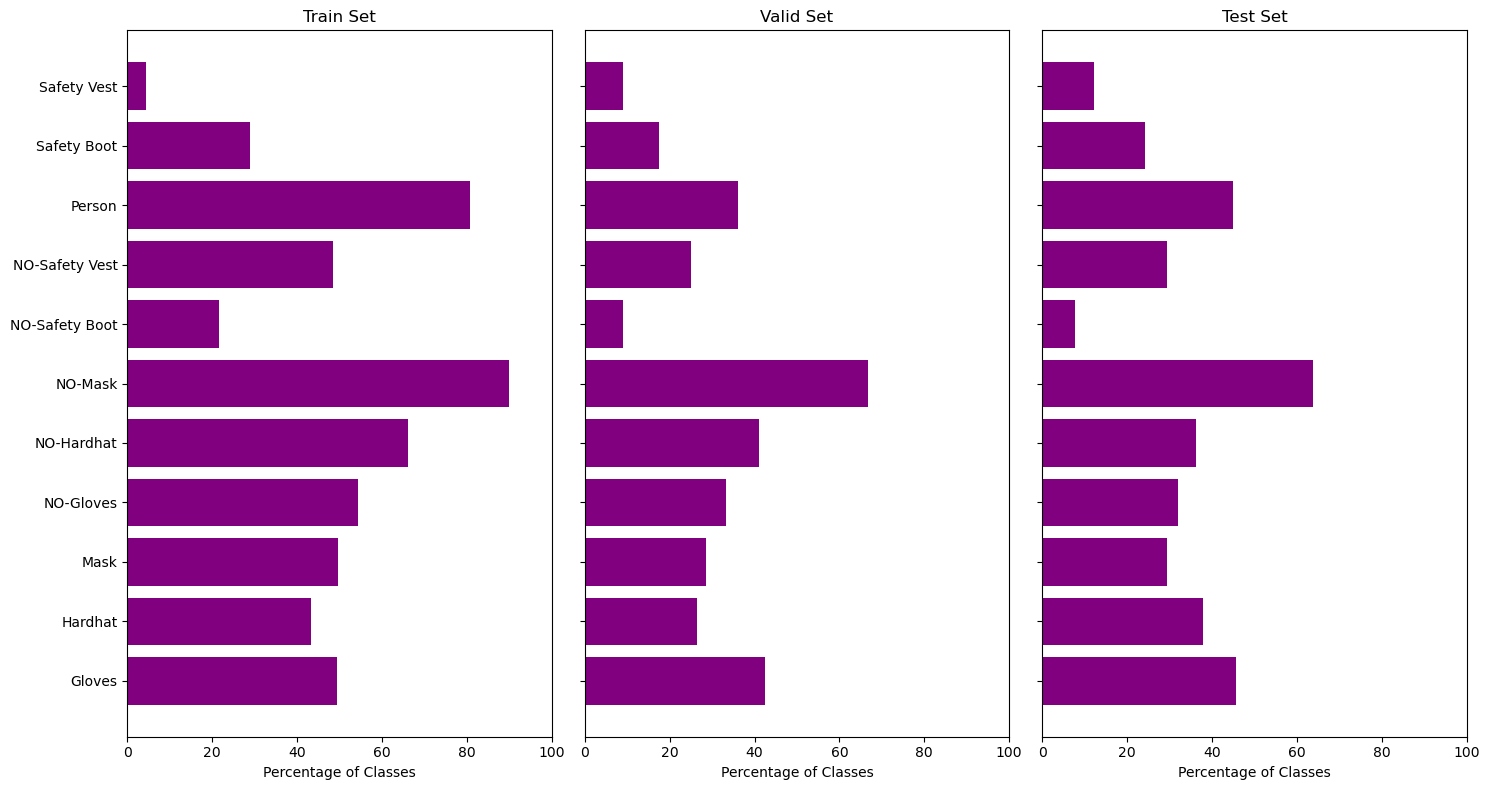

In [20]:
# Plot class distribution using horizontal bar plot (Matplotlib)
fig, ax = plt.subplots(1, 3, figsize=(15, 8), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    df = pd.DataFrame({mode: class_stat[mode]})
    
    # Ensure classes with zero counts are included
    df = df.T / data_len[mode] * 100 if data_len[mode] > 0 else df.T  # Avoid division by zero
    ax[i].barh(df.columns, df.loc[mode], color='purple')
    
    ax[i].set_title(f"{mode.capitalize()} Set")
    ax[i].set_xlabel('Percentage of Classes')
    ax[i].set_xlim(0, 100)
    ax[i].set_yticks(range(num_classes))
    ax[i].set_yticklabels(classes)

plt.tight_layout()
plt.show()


In [9]:
# Print image sizes in each dataset
for mode in ['train', 'valid', 'test']:
    print(f'\n--- Image Size Summary for {mode.capitalize()} Dataset ---')
    img_size_list = []
    for file in glob.glob(os.path.join(Input_path, mode, 'images', '*')):
        image = Image.open(file)
        size_str = f"Resolution: {image.size[0]}x{image.size[1]} pixels"
        if size_str not in img_size_list:
            img_size_list.append(size_str)
            print(f' - {size_str}')



--- Image Size Summary for Train Dataset ---
 - Resolution: 640x640 pixels

--- Image Size Summary for Valid Dataset ---
 - Resolution: 640x640 pixels

--- Image Size Summary for Test Dataset ---
 - Resolution: 640x640 pixels


In [10]:
# Print the number of images in each dataset
for mode in ['train', 'valid', 'test']:
    files = glob.glob(os.path.join(Input_path, mode, 'images', '*'))
    print(f'\n--- {mode.capitalize()} Dataset ---')
    print(f'Total Images: {len(files)}')
    print('Status: Dataset is ready!' if len(files) > 0 else 'Status: Dataset is empty.')



--- Train Dataset ---
Total Images: 2965
Status: Dataset is ready!

--- Valid Dataset ---
Total Images: 144
Status: Dataset is ready!

--- Test Dataset ---
Total Images: 116
Status: Dataset is ready!
